In [1]:
from PIL import Image
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
DIR = "/Users/damoncrockett/Desktop/"

In [3]:
df = pd.read_csv(DIR+"phew_hsv.csv")

### Plot

In [46]:
thumb_side = 8
sort_vars = ['hue']

In [47]:
def cratio(nbins):
    df['xbin'] = pd.cut(df.secpast,nbins,labels=False)
    bin_max = df.groupby('xbin').size().max()
    diff = 2*np.pi - float(nbins)/bin_max
    return diff

In [48]:
import matplotlib.pyplot as plt

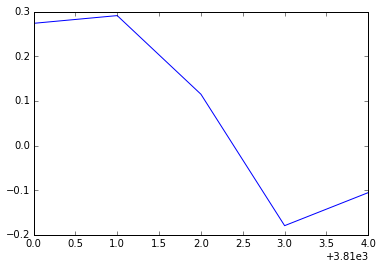

In [49]:
nbins = range(3810,3815)
cratios = [cratio(item) for item in nbins]
fig,ax = plt.subplots()
ax.plot(nbins,cratios)

In [50]:
diffs = [abs(item) for item in cratios]
mindiff = diffs.index(min(diffs))
nbins = nbins[mindiff] # this setting makes it so that the circumference and radius are appropriate

In [51]:
df['xbin'] = pd.cut(df.secpast,nbins,labels=False)
bin_max = df.groupby('xbin').size().max()

In [52]:
px_w = (bin_max * 2 * thumb_side) + thumb_side
px_h = px_w

In [53]:
print px_w, px_h

9560 9560


In [54]:
canvas = Image.new('RGB',(px_w,px_h),'hsl(180,0%,50%)')

In [55]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [56]:
def bin2phi(binn):
    incr = float(360)/nbins
    return np.radians(incr*binn)

In [57]:
def bin2phideg(binn):
    incr = float(360)/nbins
    return incr*binn

In [58]:
bins = list(set(list(df.xbin)))

In [59]:
bins.sort()

In [60]:
for item in bins:
    if np.random.binomial(1,.001)==1:
        print item
    
    tmp = df[df.xbin==item]
    tmp.sort_values(by=sort_vars,inplace=True,ascending=False)
    tmp.reset_index(drop=True,inplace=True)

    for i in range(len(tmp)):
        im = Image.open(tmp.local_path.loc[i])
        im = im.convert('RGBA')
        im.thumbnail((thumb_side,thumb_side),Image.ANTIALIAS)
        pos = bin_max - i
        xy = pol2cart(pos,bin2phi(item))
        phi = bin2phideg(item)
        im = im.rotate(phi,expand=1)
        
        xcoord = int(round((xy[0] + bin_max) * thumb_side))
        ycoord = int(round((bin_max - xy[1]) * thumb_side)) #bc high in the image is low y
        canvas.paste(im,(xcoord,ycoord),im) # tmp treated as a mask for itself

/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


434
510
630
732
1158
2384
2978
3081
3782


In [61]:
canvas.save(DIR+"secondlook.png")